# Roteiro 3
Nesse notebook, vamos estudar o efeito das distorções harmonicas em um sinal senoidal.

* relacionar a fft de um sinal puro com a fft de um sinal distorcido.
* identificar as causas para o surgimento de harmônicas
* prever as consequências da presença de harmônicas em um sinal
* identificar estratégias para remover harmônicas da rede

## Relatório
As questões do roteiro devem ser respondidas em um arquivo google docs e submetidas no google classroom. Anexe uma cópia dos códigos utilizados e um breve vídeo explicando o que foi feito.

Inicialmente, vamos carregar algumas bibliotecas de Python. As primeiras são meio básicas. A última serve para podermos ouvir arquivos de áudio diretamente no notebook.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import IPython.display as ipd

# Não-linearidades

Uma das causas do surgimento de componentres harmônicos em um sinal senoidal é a presença de não linearidades neste sinal. Para demonstrar vamos inicialmente observar o espectro da transformada de Fourier de um sinal senoidal puro gravado pelo microfone do computador:

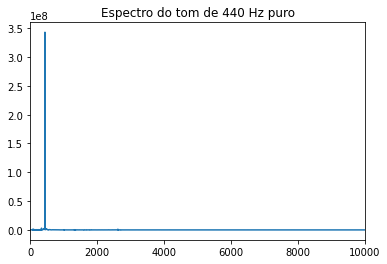

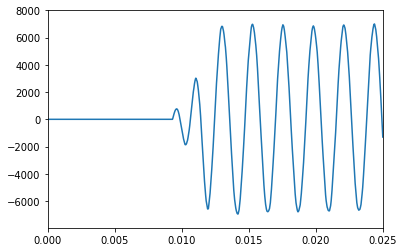

In [ ]:
#Análise da resposta do sistema de microfone do computador
from scipy.io import wavfile

fs, tom_puro = wavfile.read('Tom-puro.wav')

tom_puro = tom_puro[:100000] #Limitando o número de amostras
tom_puro = tom_puro[:,0] #Selecionando apenas um canal de áudio
N = len(tom_puro)

fft_puro = np.fft.fft(tom_puro)
f=np.arange(N)*fs/N
plt.plot(f[0:int(N/2)],np.abs(fft_puro)[0:int(N/2)])
plt.title('Espectro do tom de 440 Hz puro')
plt.xlim(0,10000)

plt.figure()
plt.xlim(0,0.025)
t = np.arange(N)/fs
plt.plot(t,tom_puro)

ipd.Audio(tom_puro,rate=fs)

Comparando com o espectro do mesmo tom, mas gravado em um volume onde ocorre a saturação do sinal, observamos o surgimento de frequências que não são o tom original

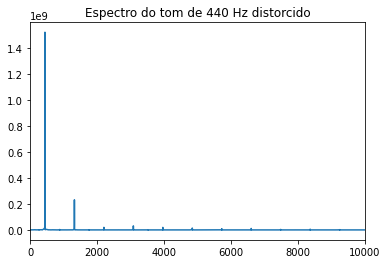

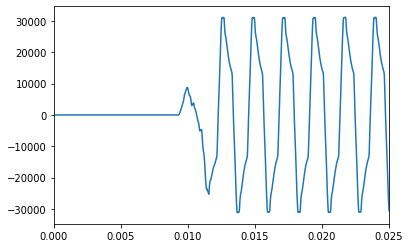

In [ ]:
#Análise da resposta do sistema de microfone do computador com saturação
fs, distorcido = wavfile.read('Distorcido.wav')

distorcido = distorcido[:100000] #Limitando o número de amostras
distorcido = distorcido[:,0] #Selecionando apenas um canal de áudio
N = len(distorcido)

fft_distorcido = np.fft.fft(distorcido)
f=np.arange(N)*fs/N
plt.plot(f[0:int(N/2)],np.abs(fft_distorcido)[0:int(N/2)])
plt.title('Espectro do tom de 440 Hz distorcido')
plt.xlim(0,10000)

plt.figure()
plt.xlim(0,0.025)
t = np.arange(N)/fs
plt.plot(t,distorcido)

ipd.Audio(distorcido, rate=fs)



# Chaveamentos e interrupções abruptas


Outra fonte comum de não-linearidades são chaveamentos e transições abruptas no sinal, que ocorrem comumente em retificadores e equipamentos de eletrônica de potência. Para analisar seu efeito, considere inicialmente o sinal senoidal de tensão da rede elétrica.

Text(0.5, 1.0, 'Senoide 60 Hz')

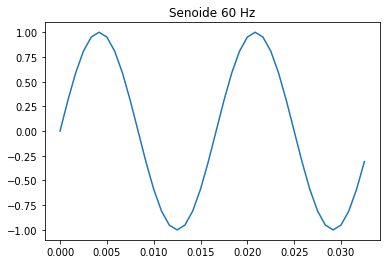

In [ ]:
fs=1200
length=1
t=np.arange(0,length,1/fs)
fm=60
senoide=np.sin(2*np.pi*t*fm)
plt.plot(t[0:2*int(fs/fm)],senoide[0:2*int(fs/fm)])
plt.title('Senoide 60 Hz')


Text(0.5, 1.0, 'Espectro da Senoide 60 Hz')

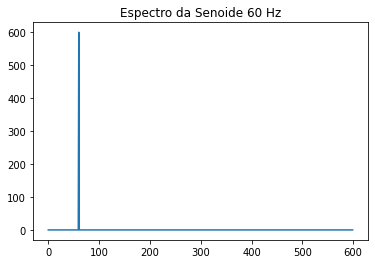

In [ ]:
N=len(t)
fft_senoide=np.fft.fft(senoide)
f=np.arange(N)*fs/N
plt.plot(f[0:int(N/2)],np.abs(fft_senoide)[0:int(N/2)])
plt.title('Espectro da Senoide 60 Hz')

Em seguida vamos observar o espectro de fourier de uma onda quadrada com a mesma frequencia do sinal senoidal observado anteriormente

Text(0.5, 1.0, 'Onda quadrada do retificador de meia onda')

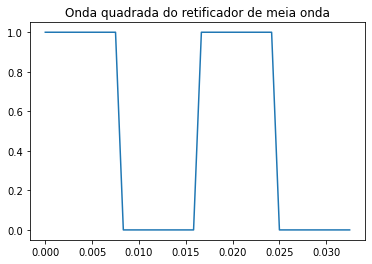

In [ ]:
square_block=np.append(np.ones(int(fs/(2*fm))),np.zeros(int(fs/(2*fm))))
square=np.tile(square_block,int(length*fm))
plt.plot(t[0:2*int(fs/fm)],square[0:2*int(fs/fm)])
plt.title('Onda quadrada do retificador de meia onda')



Text(0.5, 1.0, 'Espectro da onda quadrada')

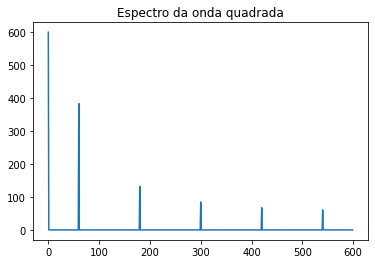

In [ ]:
N=len(t)
fft_square=np.fft.fft(square)
f=np.arange(N)*fs/N
plt.plot(f[0:int(N/2)],np.abs(fft_square)[0:int(N/2)])
plt.title('Espectro da onda quadrada')

Agora responda:
- Qual deve ser o espectro de um retificador de meia onda? (O produto de uma senóide com a onda quadrada) 
- Trace a onda retificada e o seu espectro
- Identifique as principais frequências que aparecem no espectro e explique a sua origem




Se observarmos um retificador de onda completa, observamos o seguinte espectro:

Text(0.5, 1.0, 'Onda quadrada do retificador de onda completa')

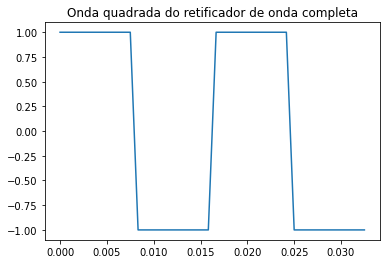

In [ ]:
square2_block=np.append(np.ones(int(fs/(2*fm))),-np.ones(int(fs/(2*fm))))
square2=np.tile(square2_block,int(length*fm))
plt.plot(t[0:2*int(fs/fm)],square2[0:2*int(fs/fm)])
plt.title('Onda quadrada do retificador de onda completa')


Text(0.5, 1.0, 'Espectro da onda quadrada')

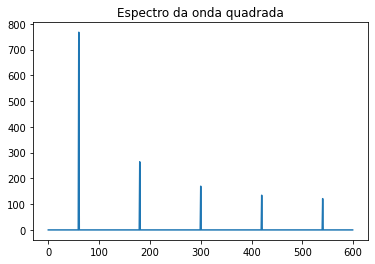

In [ ]:
N=len(t)
fft_square2=np.fft.fft(square2)
f=np.arange(N)*fs/N
plt.plot(f[0:int(N/2)],np.abs(fft_square2)[0:int(N/2)])
plt.title('Espectro da onda quadrada')

Text(0.5, 1.0, 'Espectro da onda retificada')

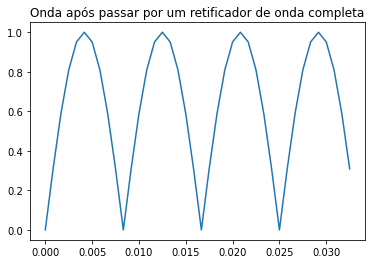

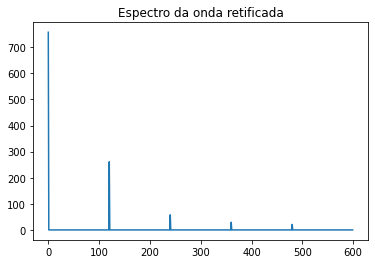

In [ ]:
ret_completo=np.multiply(senoide,square2)
plt.plot(t[0:2*int(fs/fm)],ret_completo[0:2*int(fs/fm)])
plt.title('Onda após passar por um retificador de onda completa')

plt.figure()
fft_ret_completo=np.fft.fft(ret_completo)
f=np.arange(N)*fs/N
plt.plot(f[0:int(N/2)],np.abs(fft_ret_completo)[0:int(N/2)])
plt.title('Espectro da onda retificada')

- Qual a diferença para o espectro do retificador de meia onda apresentado no item anterior?
- Qual a causa dessa diferença?

Um outro dispositivo de eletrônica de potência é o tiristor, que é capaz de controlar o momento de início da condução de um retificador. O espectro da onda senoidal após passar por um desses dispositivos é apresentado abaixo:

Text(0.5, 1.0, 'Espectro de Fourier da onda controlada')

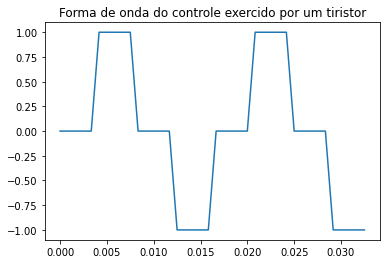

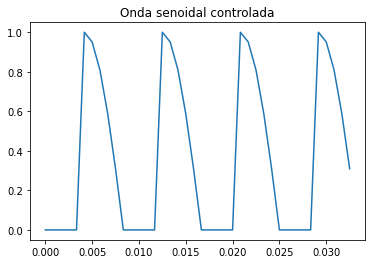

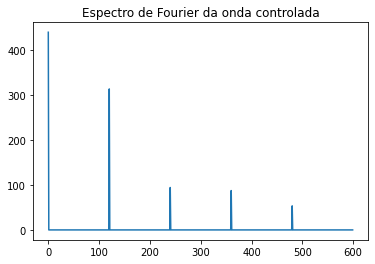

In [ ]:
square_block_tir=np.append(np.zeros(int(fs/(4*fm))),np.ones(int(fs/(4*fm))))
square_block_tir=np.append(square_block_tir,-square_block_tir)
square_tir=np.tile(square_block_tir,int(length*fm))
plt.plot(t[0:2*int(fs/fm)],square_tir[0:2*int(fs/fm)])
plt.title('Forma de onda do controle exercido por um tiristor')

ret_tir=np.multiply(senoide,square_tir)
plt.figure()
plt.plot(t[0:2*int(fs/fm)],ret_tir[0:2*int(fs/fm)])
plt.title('Onda senoidal controlada')

plt.figure()
fft_ret_tir=np.fft.fft(ret_tir)
f=np.arange(N)*fs/N
plt.plot(f[0:int(N/2)],np.abs(fft_ret_tir)[0:int(N/2)])
plt.title('Espectro de Fourier da onda controlada')

Podemos observar que apesar da forma da onda ser muito diferente da onda que passou por um retificador de onda completa, seu espectro de Fourier é muito semelhante.
- Porque a diferença do sinal no tempo não se reflete no espectro apresentado?
- De qual forma podemos observar diferença entre esses dois sinais no domínio de Fourier?

# Impacto da presença de harmônicas no sinal

A distorção harmônica é um fenômeno frequentemente presente em sistemas de potência, e a origem e os efeitos de harmônicas nestes sistemas devem ser cuidadosamente estudados. Uma referência interessante nesse sentido é [esta](http://www.dsce.fee.unicamp.br/~antenor/pdffiles/qualidade/a5.pdf) apostila do Prof. Antenor Pomilio, do curso de pós-graduação IT012 - Avaliação da Qualidade da Energia Elétrica, que discute vários aspectos importantes destas distorções. De particular interesse para este experimento, a seção 5.1 discute a origem de vários efeitos não lineares em sistemas de potência, como a saturação magnética, cargas eletrônicas e a presença de tiristores e retificadores. 

A seção 5.8 discute alguns efeitos das distorções harmônicas, que incluem o surgimento de frequências que podem coincidir com a frequência de ressonância do sistema, aparecimento de vibrações e ruído, sobreaquecimento de componentes, erros de medições, entre outros. A seção 5.9 discute formas de quantificar a distorção harmônica, e a seção 5.10 discute formas de mitigar seus efeitos. 

O estudo de distorções harmônicas também é muito importante em sistemas de áudio, e [essa](https://www.sonarworks.com/soundid-reference/blog/learn/when-distortion-is-good/) é uma referência que me pareceu interessante. O problema é o mesmo: saturação de componentes, *clipping* e outros efeitos não lineares levam ao surgimento de novas frequências que não existiam no sinal original, ou seja, à distorção harmônica. Mas no caso de áudio a situação é um pouco particular: enquanto algumas distorções harmônicas causam efeitos nitidamente desagradáveis e devem ser evitadas, em alguns casos os efeitos da distorção são na realidade agradáveis, e são introduzidos intencionalmente no sinal.

Finalmente, uma pequena anedota, que possivelmente não é verdadeira mas ilustra bem o problema das harmônicas. Seguindo os princípios vistos no experimento 2, os canais de televisão analógicos operavam ocupando faixas de frequência distintas, pré-estabelecidas pela ANATEL da época. Para garantir que uma estação não interferisse em outra, quando a ANATEL cedia uma faixa de frequência para um canal de TV em Campinas, as faixas adjacentes só poderiam ser utilizadas em cidades mais distantes. Assim, enquanto Campinas tinha os canais 8, 10 e 12, São Paulo tinha os canais 7, 9 e 11, por exemplo. Dessa forma, se o sinal do canal 7 em São Paulo "vazasse" um pouco para a faixa do canal 8, ele chegaria com pouca potência em Campinas, e causaria pouca interferência.

O problema é que Jundiaí fica no meio do caminho e recebe os sinais de ambas as cidades. E um cidadão de Jundiaí estava insatisfeito: ele gostava muito de um determinado programa, digamos no canal 9 de São Paulo, mas a qualidade estava péssima, ele observava com frequência o aparecimento de uma imagem fantasma. Ocorre que na mesma hora desse programa, o canal 8 de Campinas (de novo, o número do canal é conpletamente fictício, só importa que era adjacente) transmitia a Vila Sésamo, um antigo programa que tinha um pássaro enorme e amarelo chamado Garibaldo. E o cidadão de Jundiaí reparou que os fantasmas no canal 9 coincidiam com a aparição do Garibaldo no canal 8 de Campinas.

O que tudo isso tem a ver com distorção harmônica? Bom, a enorme imagem amarela do Garibaldo era um sinal de amplitude muito alta. Isso fazia com que os amplificadores da estação 8 de Campinas operassem próximos da saturação, e fora de seu regime linear. As não linearidades introduzidas por esses amplificadores geravam, toda vez que o Garibaldo aparecia, componentes harmônicas que não estavam sendo devidamente mitigadas. Com isso, apareciam novos componentes em frequência, exatamente na faixa do canal 9, e estes causavam os fantasmas.

# Filtro para remoção de harmonicas

- Limpe o sinal recortado pelo retificador de meia onda de forma a preservar somente a frequência fundamental e eliminar as harmônicas geradas. Apresente um trecho do sinal no tempo e seu espectro